# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos. 


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [2]:
# !pip install regressors 

In [3]:
import pandas as pd 
import seaborn as sns 
sns.set(style='whitegrid', context= 'notebook')

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [4]:
df = pd.read_csv('/home/roy/Regresion_lineal/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<AxesSubplot:>

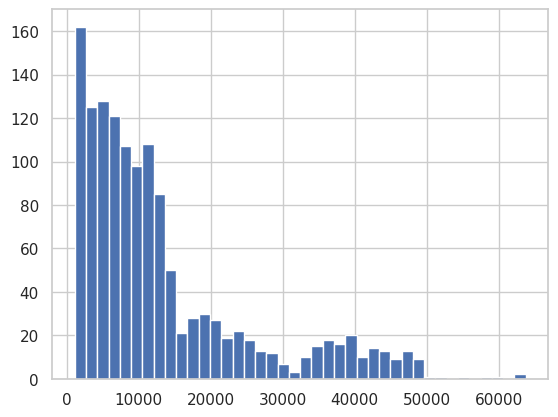

In [5]:
print(df.shape)
df.charges.hist(bins = 40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [6]:
df[df.charges>50000]
df = df[df.charges<50000]

En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan. 

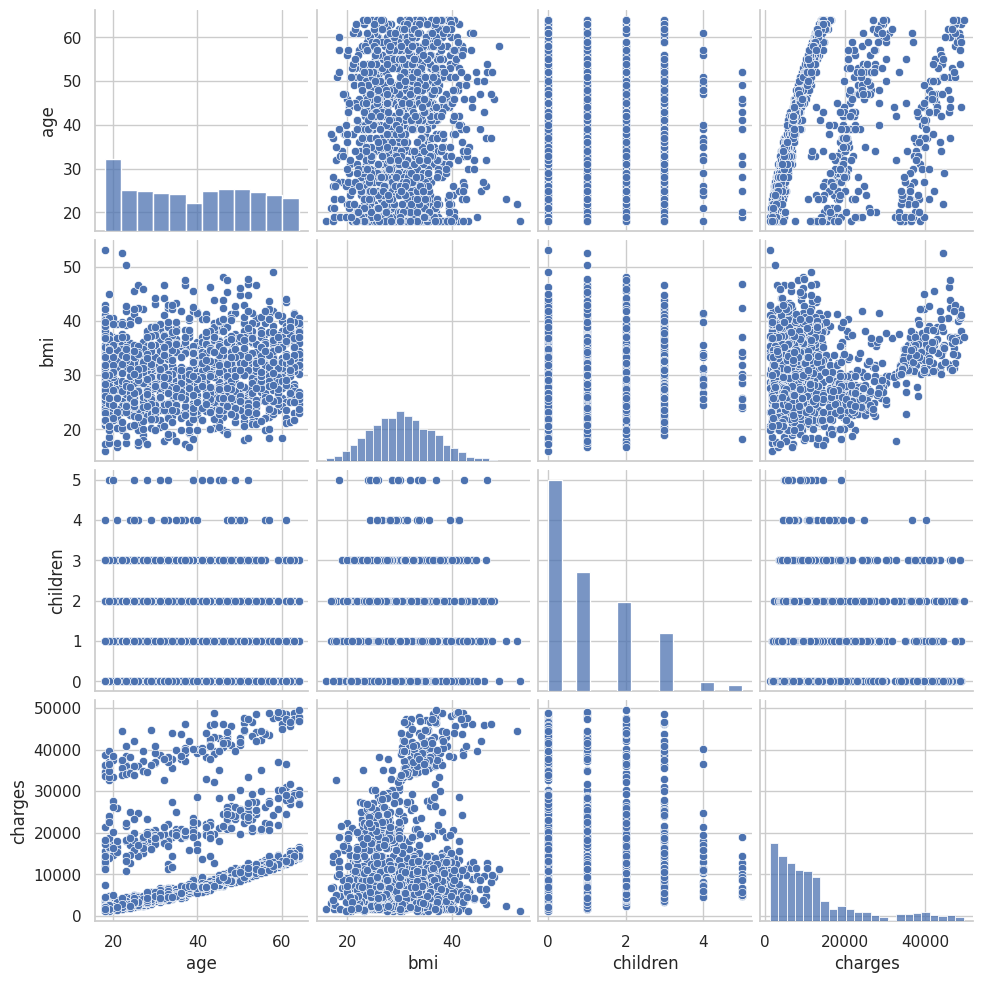

In [7]:
import matplotlib.pyplot as plt 

sns.pairplot(df, height=2.5)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

<AxesSubplot:>

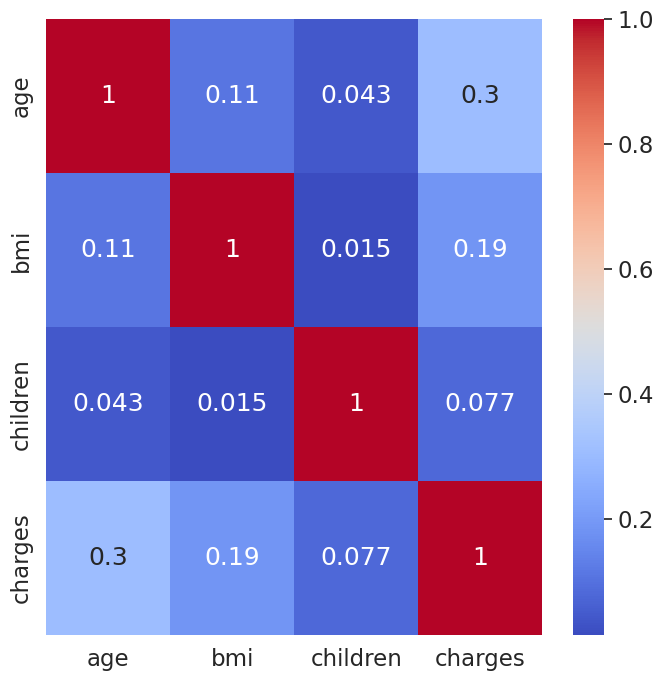

In [8]:
import numpy as np 
numeric_cols=['age','bmi','children','charges']
cm = np.corrcoef(df[numeric_cols].values.T)
plt.figure(figsize=(8, 8))
sns.set(font_scale= 1.5)
sns.heatmap(cm,annot=True,yticklabels=numeric_cols,xticklabels=numeric_cols,cmap='coolwarm')

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas. 

Ahora la verás en acción

In [9]:
df = pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True,dtype=int)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:>

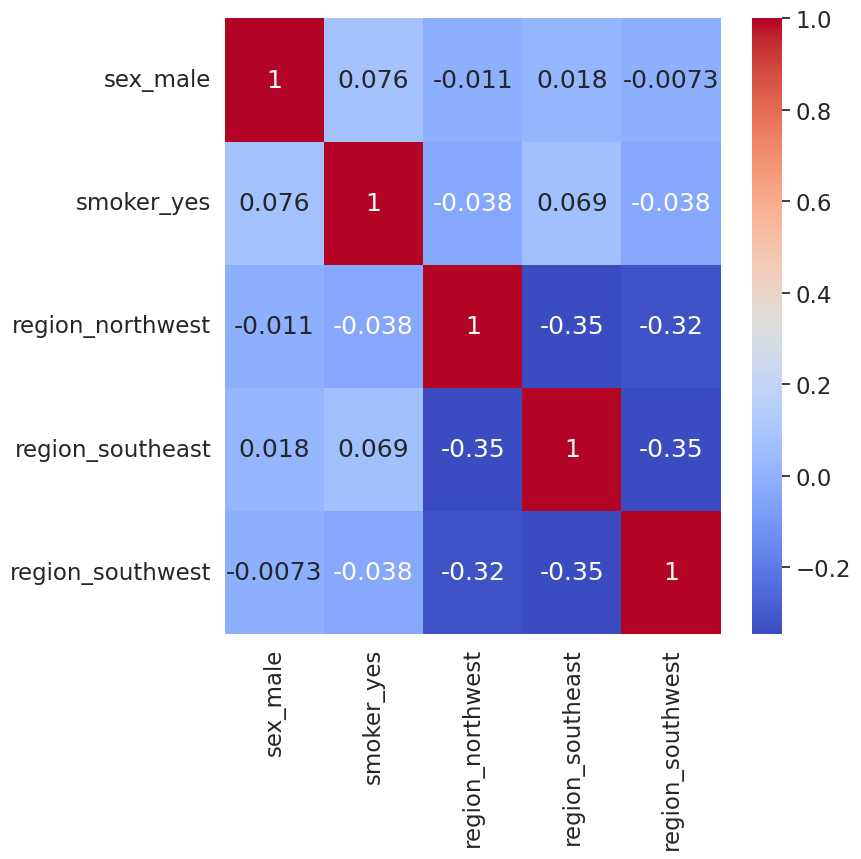

In [10]:
import numpy as np 
categorical_cols=['sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']
cm = np.corrcoef(df[categorical_cols].values.T)
plt.figure(figsize=(8, 8))
sns.set(font_scale= 1.5)
sns.heatmap(cm,annot=True,yticklabels=categorical_cols,xticklabels=categorical_cols,cmap='coolwarm')

## Creando modelos 
Primero se usará un modelo con todas las variables.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # crea un data set de prueba y otro de entrenamiento

In [12]:
X_cols = list(set(df.columns)-set(['charges'])) # esto te da todas la columnas excepto una que es la variable predictoras, set elimina los duplicados 
y_col = ['charges']

X= df[X_cols].values # da toda la informacion que este en estas columnas y lo poner en un array 
y = df[y_col].values

X_train, X_test, y_train,y_test = train_test_split(X,y) # crea las variables de prueba y entrenamiento 
sc_x = StandardScaler().fit(X) # hace la estandarizacion y ajusta los valores al modelo 
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train) # entrenamiento para ajustar el modelo y crearlo 
X_test = sc_x.transform(X_test)# evaluar el modelo y entender que tan bueno es 
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [13]:
y_pred.shape

(333, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

σ Objetivo es evaluar el modelo hecho en la clase anteior, para ello se usara la libreria llamada regresors.

1 . Se necesita importar las metricas necesarias, para continuar, por ello se usa: 

" import sklearn.metrics as metrics “
+Estableciendo las abreviaturas que se van a usar en el codigo.

In [14]:
import sklearn.metrics as metrics 
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

# +Ahora se imprimen los valores de r2, mas ponemos una funcion de round 4,
# osea que de ser numero decimal, se nos muestre hasta el 4to digito.

print('r2:',r2.round(4))
print('mse:', mse.round(4))

# +Con este ultimo, nos arrojara valores que nos sirven para entender el modelo.

r2: 0.7085
mse: 0.2651


valores de
” r2 0.7067 “
” mse: 0.2508"

A lo que el hace una nota diciendo. que “R2” tiene un 70% mientras que “mse” tiene un 25%.

NOTA: Modelo que sea evaluado arriba de 75%, es un aceptable modelo para trabajar, un 85% es excelente y arriba de 95% es casi perfecto. Mas nota que si tiene un modelo de 100%, posiblemente esta solamente evaluando ciertos resultados y no el espectro completo, por ello tenga overfiting, y halla que corregirlo.

El siguiente código muestra un resumen general de los resultados.

2 .importar las stadisticas de la librera regressors. usando:

" from regressors import stats "
+Debido a que ya debio haber sido instalado regresor anteriormente, uno solo especifica lo que quiere sacar.

----------> Ahora hay que limpiar los pasos del modelo, debido a que la funcion “regressors” necesita que los datos del intercepto y de la pendiente tengan un tipo de formula especifica para que sea mas facil analizar los resultados.

3 . " model.intercept_ = model.intercept_[0] "
     +Notese que " [0] " se refiere al valor, debido a que 

In [15]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1) # esto permite que la libreria stats utilize coeficientes y los interceptos adecuados

“ahora mismo lo entrega como una lista”

" model.coef_ = model.coef_.reshape(-1) "
+Esto permite que cuando apliquemos la funcion que necesitemos utilice los coeficientes y modelos que estan en la libreria “stats” de una forma adecuada.

--------->El sig. paso en el codigo es empezar a usar la funcion ya establecida, para ello :

4 . " y_test = y_test.reshape(-1) “

+ Hacemos un reshape para que se pueda usar de manera correcta.

+ Y ahora resta imprimir los resultados. para ello hacemos

” print(“Summary”) "

stats.summary(model, X_test, y_test, X_cols)

+ Summary del modelo, con los datos de prueba, del dato de “x” y "y"



In [16]:
y_test = y_test.reshape(-1)
print('==========Sumary=========')
stats.summary(model,X_test,y_test,X_cols)

==========Sumary=========
Residuals:
   Min      1Q  Median     3Q    Max
-2.055 -0.1385  0.0895 0.2618 0.9478


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.002627    0.028302  -0.0928  0.926098
children          0.040193    0.027943   1.4384  0.151274
sex_male         -0.003160    0.028313  -0.1116  0.911208
region_southeast -0.037824    0.032998  -1.1462  0.252525
age               0.308638    0.028116  10.9773  0.000000
region_southwest -0.029943    0.032606  -0.9183  0.359113
bmi               0.176308    0.028679   6.1476  0.000000
smoker_yes        0.804047    0.029293  27.4483  0.000000
region_northwest -0.012714    0.033467  -0.3799  0.704273
---
R-squared:  0.70853,    Adjusted R-squared:  0.70133
F-statistic: 98.45 on 8 features


## ==========Sumary=========

Residuales:

Los residuales son las diferencias entre los valores reales de la variable dependiente (los costos médicos reales) y los valores predichos por el modelo de regresión. En resumen, mide cuánto se desvían los valores predichos del modelo con respecto a los valores reales.

* Min: El valor mínimo de los residuales es -2.0176.

* 1Q: El primer cuartil de los residuales es -0.0793. Esto significa que el 25% de las diferencias entre los valores predichos y reales son menores o iguales a este valor.

* Median: La mediana de los residuales es 0.1121. Esto indica que la mitad de las diferencias entre los valores predichos y reales son menores o iguales a este valor.

* 3Q: El tercer cuartil de los residuales es 0.2699. El 75% de las diferencias entre los valores predichos y reales son menores o iguales a este valor.

* Max: El valor máximo de los residuales es 0.919.

Coeficientes:

Los coeficientes son valores que indican la magnitud y dirección de la relación entre las variables independientes y la variable dependiente. Cada variable independiente tiene un coeficiente asociado.

* Estimate (Estimación):

El "Estimate" es el valor numérico que indica la magnitud de la relación entre la variable independiente y la variable dependiente. En otras palabras, es el coeficiente de regresión que muestra cuánto cambia la variable dependiente (costo médico) en promedio por un cambio de una unidad en la variable independiente correspondiente.

Por ejemplo, si tomamos el coeficiente "smoker_yes" que tiene un valor de 0.806912, significa que, en promedio, los fumadores tienen un costo médico aproximadamente 0.806912 veces mayor que los no fumadores. Es importante tener en cuenta que el valor puede ser positivo o negativo, lo que indica la dirección de la relación (positiva o negativa) entre la variable independiente y la variable dependiente.

* Std. Error (Error estándar):

El "Error estándar" es una medida de la precisión de la estimación del coeficiente. Representa la cantidad esperada de variación en el coeficiente si el modelo se estima repetidamente en diferentes muestras de datos del mismo tamaño. En general, cuanto menor sea el error estándar, más precisa será la estimación del coeficiente.

Un error estándar pequeño indica que la estimación del coeficiente es confiable y que probablemente está cerca del valor real en la población. Por otro lado, un error estándar grande sugiere que la estimación del coeficiente es menos precisa y puede variar más en diferentes muestras.

* t value (Valor t):

El "Valor t" es una medida estadística que indica qué tan grande es la relación entre la variable independiente y la variable dependiente en comparación con la variabilidad inherente de los datos. Un valor t mayor en magnitud indica que el coeficiente es más significativo y menos probable que sea simplemente el resultado del azar.

Los valores t se utilizan para calcular el "p value" y, en última instancia, determinar la significancia estadística del coeficiente. Si el valor t es grande (positivo o negativo), implica que el coeficiente es más probable que sea significativo y tenga una relación real con la variable dependiente.

* p value (Valor p):

El "Valor p" es una medida clave en la inferencia estadística. Indica la probabilidad de obtener el resultado observado (o uno más extremo) si la hipótesis nula fuera cierta. La hipótesis nula en este contexto generalmente afirma que el coeficiente no tiene un efecto significativo en la variable dependiente.

Un valor p bajo (generalmente considerado como menor a 0.05 o 0.01) sugiere que el coeficiente es estadísticamente significativo, lo que significa que es poco probable que sea un resultado aleatorio y que tiene un efecto real en la variable dependiente. En cambio, un valor p alto sugiere que el coeficiente no es estadísticamente significativo y que es más probable que se deba al azar.

* F-statistic:
Este valor (97.57) es una medida de la significancia global del modelo. Un valor alto sugiere que el modelo en su conjunto es significativo y que al menos una de las variables independientes está relacionada de manera significativa con la variable dependiente.


**si R-squared:  0.70667 no cambia mucho respecto a Adjusted R-squared:  0.69943 significa que no hay mucho problema en tener todas nuestras variables en el modelo, pero se pueden eliminar estos reusltados para mejorar el modelo**

NOTAS: Ya que el modelo se entrena con datos que no tiene columnas, entonces se especifia en la tercera coma que las columnas a usar para los datos, son las que estan en las columna X

--------->Hasta este punto, debemos de cargar todas las celdas ocupadas en este ejercicio. Y nos mostrara los datos recabados en forma de tabla.

Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

<function matplotlib.pyplot.show(close=None, block=None)>

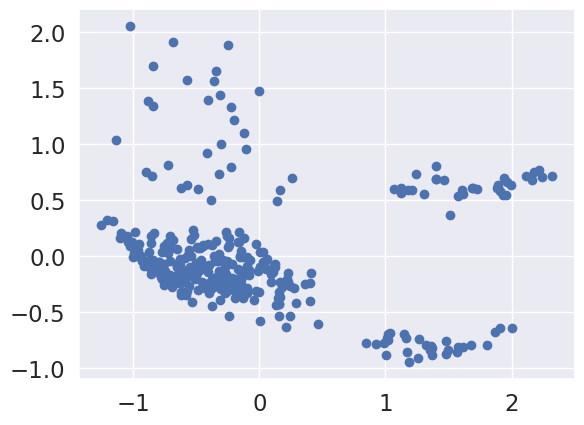

In [17]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.show


5 . Por ultimo, lo que buscamos es presentar los residuales en graficas, esto usando un scatter.

" residuals = np.subtract(y_test, y_pred.reshape(-1)) “

+ Con esto se crean los residuales.

” plt.scatter(y_pred, residuals) “

+ Con esto se define la manera en la que se presenta la funcion .

+ Por un lado se mostrara el scatter de la prediccion de “Y” y por el otro, los residuales.

NOTA: Debio a que usamos reshape(-1), en “y_test” ahora lo usamos con “y_pred”, y esto es para ambos esten en la misma direccion.

No es recomendable usar todas las variables dentro de la regresion lineal.

” plt.show() "

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [18]:
df_second = df.copy()
df_second['age2'] = df_second.age**2 # eleva age al cuadrado y lo pone como age2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int) # crea una variable sobrepeso 
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes# si es fumador con sobrepeso es 1 y si no es asi es 0 

Analizando el segundo modelo

In [28]:
X_cols = ['children','sobrepeso*fumador','smoker_yes','age2']
y_col = ['charges']

X= df_second[X_cols].values # da toda la informacion que este en estas columnas y lo poner en un array 
y = df_second[y_col].values

X_train, X_test, y_train,y_test = train_test_split(X,y) # crea las variables de prueba y entrenamiento 
sc_x = StandardScaler().fit(X) # hace la estandarizacion y ajusta los valores al modelo 
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train) # entrenamiento para ajustar el modelo y crearlo 
X_test = sc_x.transform(X_test)# evaluar el modelo y entender que tan bueno es 
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

# +Ahora se imprimen los valores de r2, mas ponemos una funcion de round 4,
# osea que de ser numero decimal, se nos muestre hasta el 4to digito.

print('r2:',r2.round(4))
print('mse:', mse.round(4))

# +Con este ultimo, nos arrojara valores que nos sirven para entender el modelo.

r2: 0.8973
mse: 0.113


In [34]:

# model.intercept_ = model.intercept_[0] como ya no esta el intercepto ya no es necesario utilizar esta linea de codigo 
model.coef_ = model.coef_.reshape(-1) # esto permite que la libreria stats utilize coeficientes y los interceptos adecuados

eliminamos las variables que tienen un valor mayor a 0.05 en p value 

In [35]:
y_test = y_test.reshape(-1)
print('==========Sumary=========')
stats.summary(model,X_test,y_test,X_cols)

==========Sumary=========
Residuals:
    Min    1Q  Median     3Q    Max
-1.7109 0.065  0.1101 0.1417 0.2799


Coefficients:
                   Estimate  Std. Error  t value  p value
_intercept         0.000000    0.018514   0.0000  1.00000
children           0.073994    0.018519   3.9955  0.00008
sobrepeso*fumador  0.491689    0.021425  22.9489  0.00000
smoker_yes         0.461528    0.022338  20.6614  0.00000
age2               0.316820    0.018719  16.9247  0.00000
---
R-squared:  0.89733,    Adjusted R-squared:  0.89608
F-statistic: 716.67 on 4 features


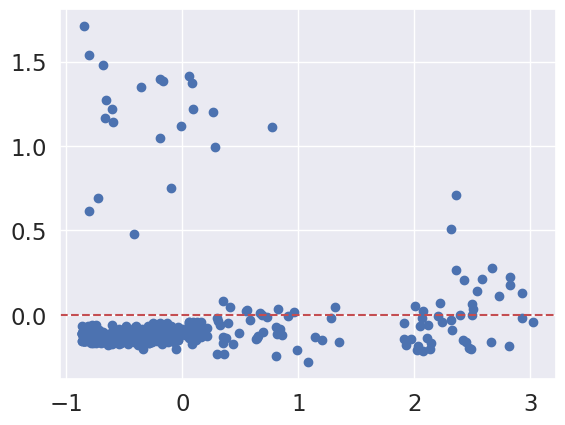

In [40]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Agregar la línea en el valor cero
plt.show() # de esta manera los puntos en el punto 0 se ajusta mejor

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculando las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimiendo los resultados
print("Error cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)
print("Error absoluto promedio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 0.11301239687757766
Raíz del error cuadrático medio (RMSE): 0.3361731650170454
Error absoluto promedio (MAE): 0.18830585920053447
Coeficiente de determinación (R^2): 0.89732944134547


* Error Cuadrático Medio (MSE):
El Error Cuadrático Medio es una medida que indica cuán cerca están las predicciones del modelo de los valores reales. Para calcularlo, se toma la diferencia entre cada valor predicho y su valor real, se eleva al cuadrado para evitar valores negativos y se promedia para obtener una medida global del error. El MSE se expresa en las mismas unidades que la variable dependiente (por ejemplo, dólares en el caso de costos médicos).

Significado: Cuanto menor sea el MSE, mejor será el rendimiento del modelo, ya que indica que las predicciones están más cercanas a los valores reales.

Valores promedio:

Bueno: Un MSE cercano a cero indica un buen ajuste del modelo, donde las predicciones son muy precisas.
Malo: Un MSE alto, por ejemplo, superior a 1 o 10, sugiere que las predicciones están bastante alejadas de los valores reales y el modelo no es preciso.

* Raíz del Error Cuadrático Medio (RMSE):
El RMSE es una versión modificada del MSE que toma la raíz cuadrada del MSE. Es más fácil de interpretar porque tiene las mismas unidades que la variable dependiente.

Significado: Al igual que el MSE, cuanto menor sea el RMSE, mejor será el rendimiento del modelo en términos de precisión.

Valores promedio:

Bueno: Un RMSE cercano a cero o alrededor de la magnitud de la variable dependiente sugiere que el modelo tiene un buen ajuste.
Malo: Un RMSE alto, por ejemplo, superior a 0.5 o 1, indica que el modelo no está prediciendo bien y hay una discrepancia significativa entre las predicciones y los valores reales.

* Error Absoluto Promedio (MAE):
El Error Absoluto Promedio es otra medida del error en las predicciones del modelo. En lugar de elevar al cuadrado las diferencias, toma el valor absoluto de cada diferencia y luego promedia esos valores.

Significado: El MAE también mide cuán cerca están las predicciones del modelo de los valores reales, pero es menos sensible a valores atípicos que el MSE.

Valores promedio:

Bueno: Un MAE cercano a cero o alrededor de la magnitud de la variable dependiente indica que el modelo está haciendo buenas predicciones.
Malo: Un MAE alto, por ejemplo, superior a 0.2 o 0.3, sugiere que el modelo tiene un rendimiento deficiente y no está prediciendo bien.

* Coeficiente de Determinación (R^2):
El Coeficiente de Determinación, también conocido como R cuadrado, es una medida que representa la proporción de la variabilidad total de la variable dependiente que el modelo puede explicar. R^2 oscila entre 0 y 1.

Significado: Cuanto más cercano sea el R^2 a 1, mejor se ajusta el modelo a los datos, lo que significa que puede explicar una mayor cantidad de la variabilidad observada en la variable dependiente. Si R^2 es cercano a 0, el modelo no está explicando bien los datos y es poco útil para hacer predicciones.

Valores promedio:

Bueno: Un R^2 cercano a 1, por ejemplo, superior a 0.8 o 0.9, indica que el modelo se ajusta bien a los datos y tiene una buena capacidad de predicción.
Malo: Un R^2 bajo, por ejemplo, inferior a 0.5, sugiere que el modelo no se ajusta bien y no es útil para hacer predicciones precisas.

## ¿Qué hay más allá de la linealidad?

ahora se usan modelos polinomial en caso de tener variables al cuadrado 

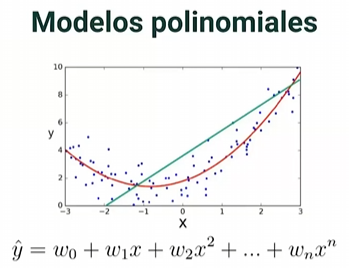





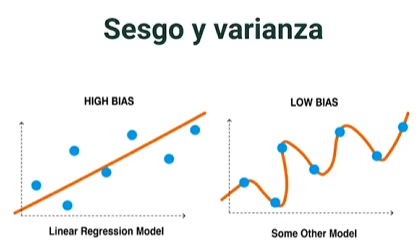

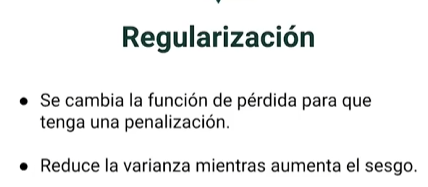

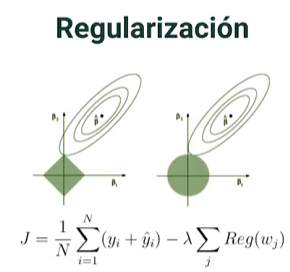